# 원리

* 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현
* 각 데이터 포인트를 2차원에 무작위로 지정 후, 원본 특성 공간에서 가까운 포인트는 가깝게, 먼 포인트는 멀게
* 새로운 데이터에는 적용 못하므로 탐색적 데이터 분석으로 쓰임

# 손글씨 데이터에 적용

## 사용할 데이터

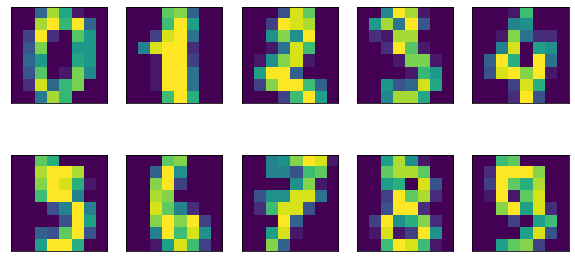

In [1]:
from ml1.preamble import*

from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for ax, img in zip(axes.flat, digits.images):
    ax.imshow(img)

## PCA를 이용한 산점도

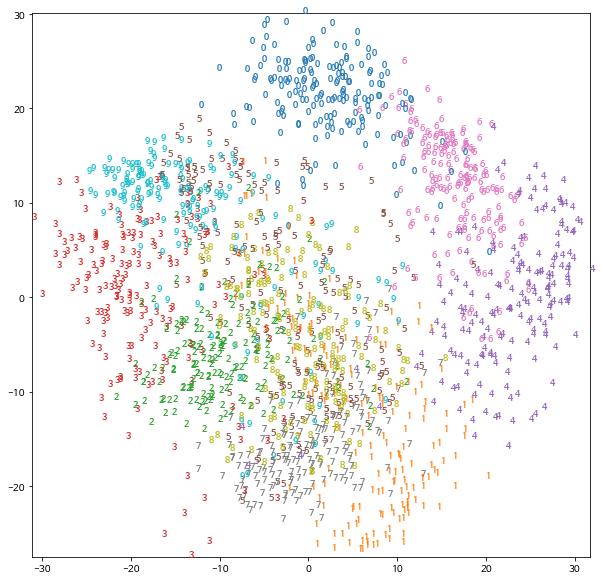

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(digits.data)
digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color = plt.cm.tab10(digits.target[i]),
             fontdict={'weight':'bold', 'size':9})

=> 중첩된 부분이 많음

## t-SNE를 이용한 산점도

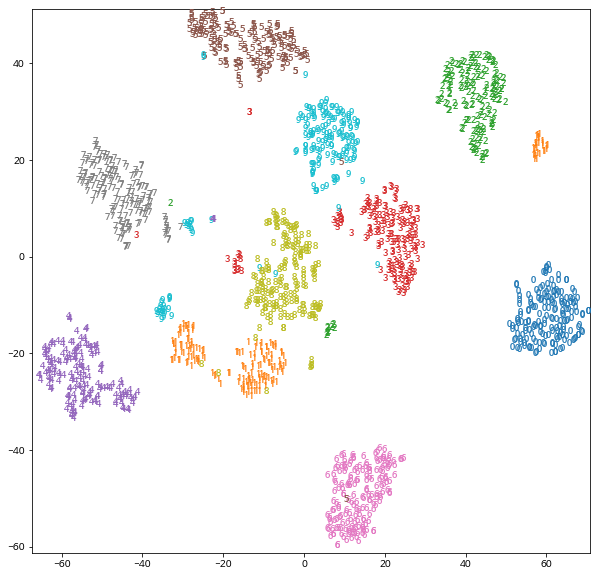

In [3]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne =tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min()-1, digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min()-1, digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), color = plt.cm.tab10(digits.target[i]),
             fontdict={'weight':'bold', 'size':9})

=> 잘 분류됨

# 매개변수

* perplexity와 early_exaggeration이 있지만 보통 기본값으로도 잘 작동함